In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [107]:
#Step 1
df = pd.read_csv('Titanic.csv')
surv = df['survived']
df = df.drop(columns=['Unnamed: 0','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','name','parch','ticket','fare','cabin','embarked','boat','body','home.dest','survived'])

le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
enc = preprocessing.OneHotEncoder()
enc.fit(df)

xTrain, xTest, yTrain, yTest = train_test_split(df, surv, test_size=0.20, random_state=41)

print(xTrain)
print(yTrain)

      pclass  sex  age  sibsp
907        2    0   29      1
761        2    1   24      0
393        1    1   38      0
532        1    1   62      0
717        2    1   26      1
...      ...  ...  ...    ...
407        1    0   44      1
243        0    1   68      0
321        0    1   86      0
1104       2    1   24      4
931        2    1   45      0

[1047 rows x 4 columns]
907     0
761     0
393     0
532     0
717     0
       ..
407     1
243     0
321     0
1104    0
931     0
Name: survived, Length: 1047, dtype: int64


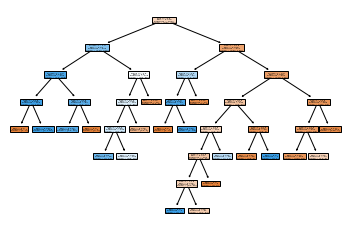

In [109]:
#Step 2
dtc = DecisionTreeClassifier(max_leaf_nodes=20)
dtc = dtc.fit(xTrain, yTrain)

tree.plot_tree(dtc, filled=True, feature_names=xTrain.columns)
print('\n')

DecisionTreeClassifier(max_leaf_nodes=7)


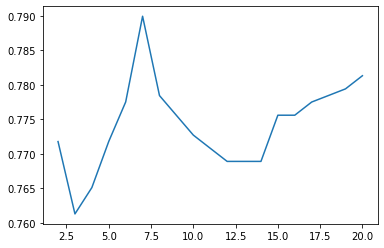

In [114]:
#Step 3
treelen = [i for i in range(2,21)]

param =  {'criterion':['gini'],'max_leaf_nodes':treelen}
dtc = GridSearchCV(DecisionTreeClassifier(), param)
dtc = dtc.fit(xTrain, yTrain)

print(dtc.best_estimator_)
plt.plot(treelen,dtc.cv_results_['mean_test_score'])

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       177
           1       0.73      0.75      0.74        85

    accuracy                           0.83       262
   macro avg       0.80      0.81      0.81       262
weighted avg       0.83      0.83      0.83       262



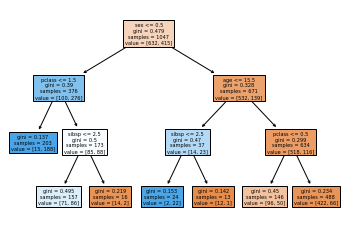

In [98]:
#Step 4
test = DecisionTreeClassifier(max_leaf_nodes=7)
test = test.fit(xTrain, yTrain)
tree.plot_tree(test, filled=True, feature_names=xTest.columns)

result = test.predict(xTest)
print(classification_report(yTest, result))


The precision for survival is 73%, and the precision for fatalities is 88%.

In [101]:
#Step 5
rfc = RandomForestClassifier(n_estimators=50,max_depth=7,max_leaf_nodes=7)
rfc.fit(xTrain,yTrain)

result = rfc.predict(xTest)
print(classification_report(yTest, result))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       177
           1       0.73      0.73      0.73        85

    accuracy                           0.82       262
   macro avg       0.80      0.80      0.80       262
weighted avg       0.82      0.82      0.82       262



The precision for survival is 73%, and the precision for fatalities is 87%. The decision tree is slightly better than the random forest, outperforming its results slightly.